In [246]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

news_train = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='train', 
                                remove=('headers', 'footers', 'quotes'))
news_test = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='test', 
                                remove=('headers', 'footers', 'quotes'))


vectorizer                = CountVectorizer(binary=True, stop_words='english', min_df = 50)
counts_train              = vectorizer.fit_transform(news_train.data)
counts_test               = vectorizer.transform(news_test.data)

## Notes
Try with TfidfVectorizer

In [10]:
LDA = LatentDirichletAllocation(10)
LDA.fit(X = counts_train)

/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [13]:
LDA.perplexity(X = counts_train)

1806.1966599312116

In [17]:
LDA_transform = LDA.transform(X =  counts_train)

In [19]:
LDA_transform[0]

array([0.00370491, 0.00370451, 0.15401383, 0.00370398, 0.05299571,
       0.6393197 , 0.00370415, 0.00370376, 0.13144542, 0.00370403])

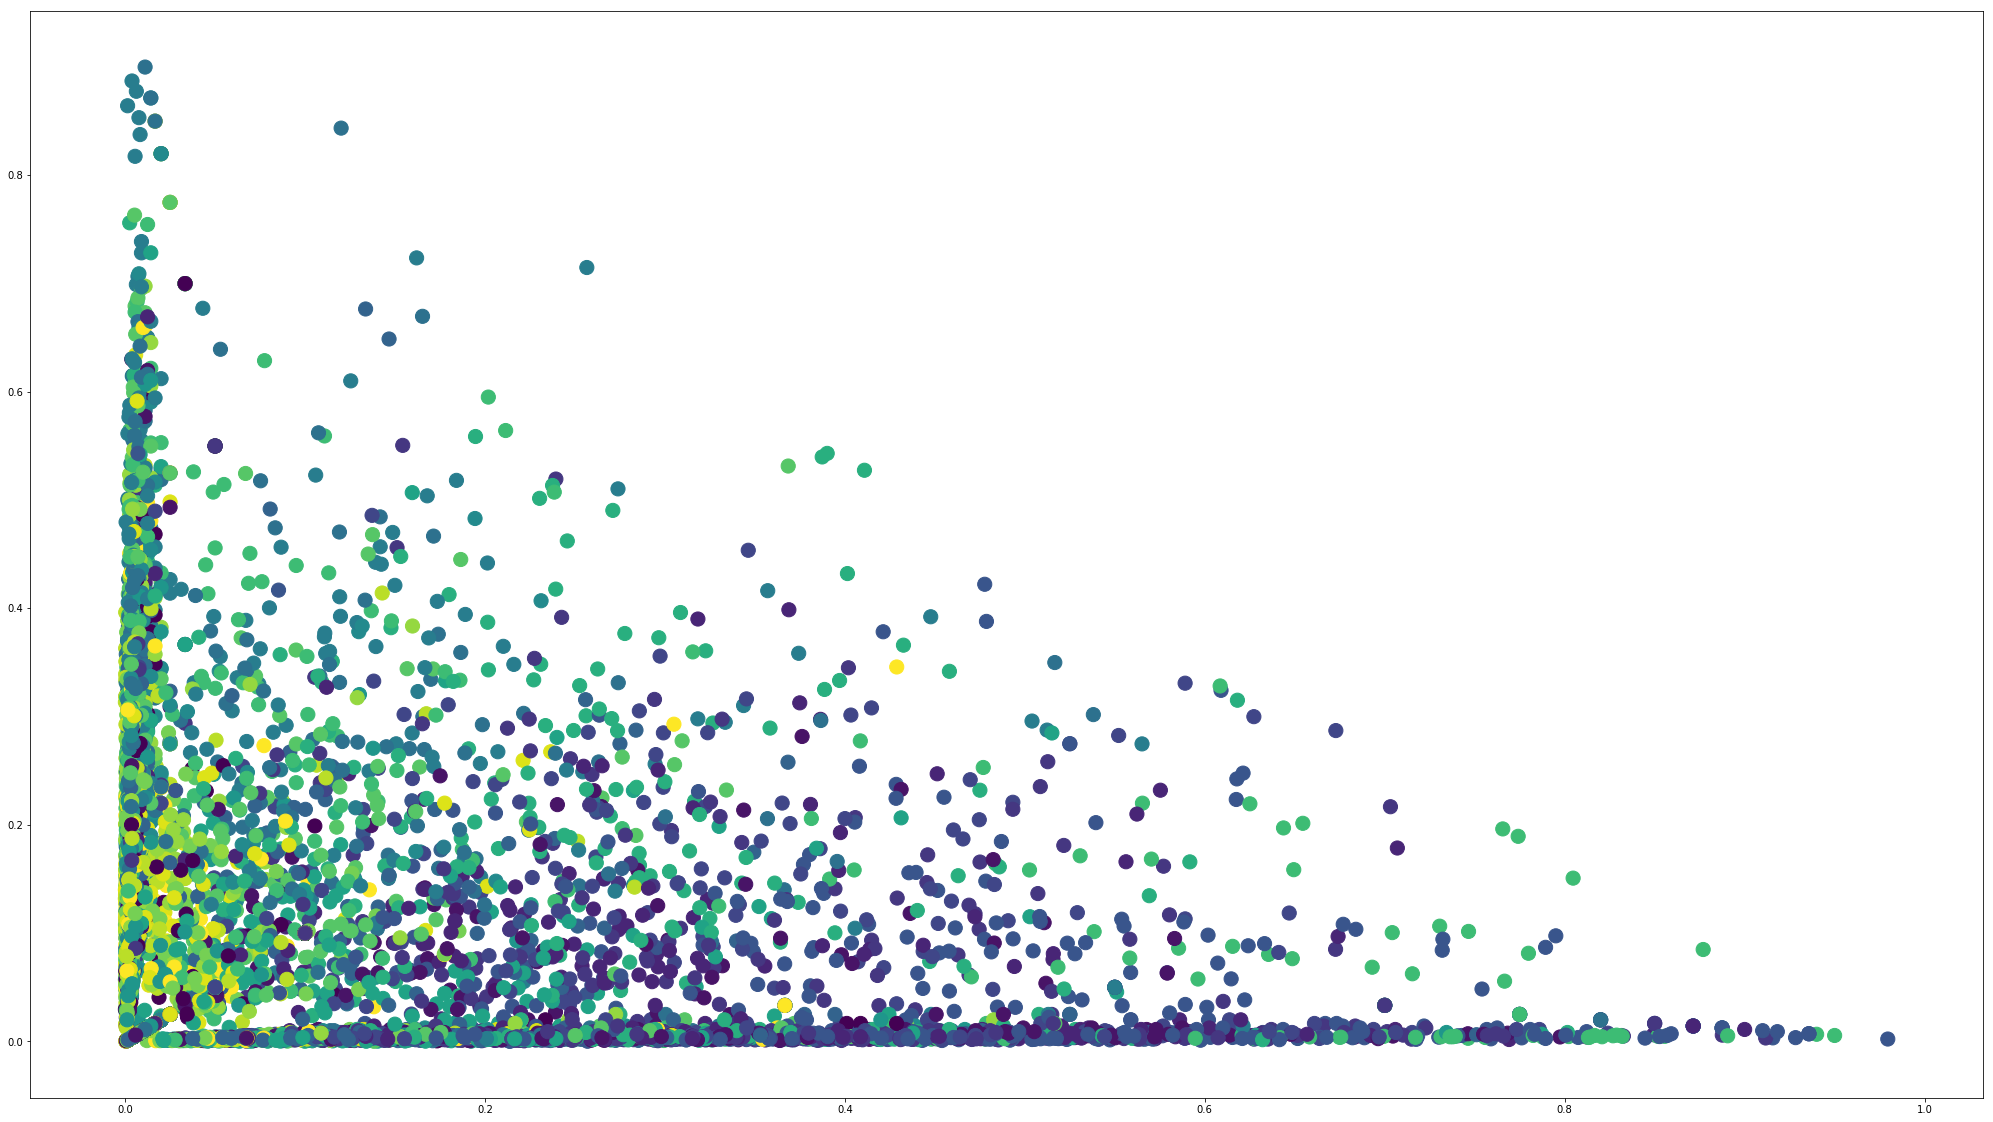

In [78]:
plt.figure(figsize = (35, 20))
plt.scatter(LDA_transform[:, 4], LDA_transform[:, 5], c=news_train.target,  s=200)

In [79]:
LDA_transform_test = LDA.transform(X =  counts_test)

In [95]:
LDA_perplexity = LDA.perplexity(X =  counts_test)

In [137]:
vectorizer.vocabulary_['05']

5

In [138]:
index_word = pd.DataFrame({word:index for index, word in vectorizer.vocabulary_.items()}, index = [0]).transpose()

In [140]:
news_df = pd.DataFrame([np.argmax(LDA_transform_test, 1), news_test.target]).transpose()

In [141]:
np.argmax(LDA_transform_test, 1)

array([2, 2, 3, ..., 2, 8, 1])

In [94]:
news_df

,0,1
0,2,7
1,2,5
2,3,0
3,0,17
4,5,19
5,6,13
6,2,15
7,8,15
8,4,5
9,8,1


In [139]:
index_word

,0
0,00
1,000
2,01
3,02
4,04
5,05
6,06
7,09
8,10
9,100


In [164]:
topics_topword = pd.DataFrame([np.argmax(LDA.components_, 1)]).transpose()

In [167]:
topics_topword = topics_topword.rename({0:'word_index'}, axis = 1)

In [168]:
topics_topword

,word_index
0,2346
1,1101
2,1353
3,1786
4,1910
5,2717
6,1786
7,1741
8,2471
9,8


In [171]:
index_word = index_word.rename({0:'word'}, axis = 1)

In [176]:
topics_topword.merge(index_word, how='left', left_on='word_index', right_index=True)

,word_index,word
0,2346,state
1,1101,god
2,1353,just
3,1786,people
4,1910,problem
5,2717,years
6,1786,people
7,1741,original
8,2471,thanks
9,8,10


In [180]:
news_df = news_df.rename({0:'predicted', 1:'actual'}, axis=1)

In [237]:
news_df['count'] = 1

In [238]:
news_df

,predicted,actual,count
0,2,7,1
1,2,5,1
2,3,0,1
3,0,17,1
4,5,19,1
5,6,13,1
6,2,15,1
7,8,15,1
8,4,5,1
9,8,1,1


In [253]:
counter_df = pd.DataFrame()

for i in range(10):
    cnt = Counter()
    actual = news_df.loc[news_df['predicted'] == i]['actual'].tolist()
    for target in actual:
        cnt[target] += 1
    
    counter_df = counter_df.append(dict(cnt), ignore_index=True)


In [255]:
counter_df = counter_df.fillna(0)

In [256]:
counter_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,24.0,22.0,15.0,9.0,18.0,15.0,14.0,32.0,22.0,24.0,13.0,28.0,16.0,30.0,41.0,24.0,31.0,167.0,40.0,13.0
1,88.0,6.0,5.0,1.0,4.0,2.0,0.0,3.0,17.0,6.0,8.0,24.0,6.0,16.0,16.0,235.0,24.0,57.0,18.0,106.0
2,35.0,32.0,40.0,51.0,70.0,25.0,37.0,205.0,156.0,278.0,290.0,39.0,93.0,49.0,77.0,8.0,56.0,31.0,34.0,25.0
3,14.0,5.0,7.0,5.0,7.0,9.0,2.0,23.0,22.0,3.0,4.0,214.0,25.0,18.0,41.0,4.0,118.0,25.0,65.0,14.0
4,3.0,41.0,53.0,98.0,60.0,166.0,11.0,5.0,5.0,4.0,0.0,12.0,51.0,7.0,7.0,0.0,0.0,1.0,0.0,2.0
5,10.0,5.0,5.0,7.0,18.0,1.0,12.0,64.0,119.0,11.0,11.0,8.0,40.0,60.0,44.0,3.0,36.0,11.0,25.0,10.0
6,135.0,26.0,31.0,9.0,11.0,14.0,2.0,22.0,24.0,26.0,19.0,31.0,23.0,163.0,100.0,104.0,86.0,77.0,120.0,70.0
7,2.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,3.0,4.0
8,2.0,241.0,228.0,198.0,187.0,150.0,264.0,28.0,17.0,16.0,5.0,30.0,117.0,47.0,28.0,12.0,5.0,4.0,2.0,7.0
9,6.0,11.0,7.0,14.0,10.0,13.0,48.0,10.0,14.0,29.0,49.0,10.0,19.0,5.0,37.0,8.0,6.0,2.0,3.0,0.0


[24.0, 22.0, 15.0, 9.0, 18.0, 15.0, 14.0, 32.0, 22.0, 24.0, 13.0, 28.0, 16.0, 30.0, 41.0, 24.0, 31.0, 167.0, 40.0, 13.0]
[88.0, 6.0, 5.0, 1.0, 4.0, 2.0, 0.0, 3.0, 17.0, 6.0, 8.0, 24.0, 6.0, 16.0, 16.0, 235.0, 24.0, 57.0, 18.0, 106.0]
[35.0, 32.0, 40.0, 51.0, 70.0, 25.0, 37.0, 205.0, 156.0, 278.0, 290.0, 39.0, 93.0, 49.0, 77.0, 8.0, 56.0, 31.0, 34.0, 25.0]
[14.0, 5.0, 7.0, 5.0, 7.0, 9.0, 2.0, 23.0, 22.0, 3.0, 4.0, 214.0, 25.0, 18.0, 41.0, 4.0, 118.0, 25.0, 65.0, 14.0]
[3.0, 41.0, 53.0, 98.0, 60.0, 166.0, 11.0, 5.0, 5.0, 4.0, 0.0, 12.0, 51.0, 7.0, 7.0, 0.0, 0.0, 1.0, 0.0, 2.0]
[10.0, 5.0, 5.0, 7.0, 18.0, 1.0, 12.0, 64.0, 119.0, 11.0, 11.0, 8.0, 40.0, 60.0, 44.0, 3.0, 36.0, 11.0, 25.0, 10.0]
[135.0, 26.0, 31.0, 9.0, 11.0, 14.0, 2.0, 22.0, 24.0, 26.0, 19.0, 31.0, 23.0, 163.0, 100.0, 104.0, 86.0, 77.0, 120.0, 70.0]
[2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 0.0, 0.0, 3.0, 1.0, 3.0, 0.0, 2.0, 1.0, 3.0, 4.0]
[2.0, 241.0, 228.0, 198.0, 187.0, 150.0, 264.0, 28.0, 17.0, 16.0, 5.0, 30.0, 

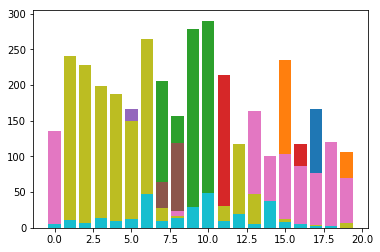

In [263]:
for index, row in counter_df.iterrows():
    print(list(row))
    plt.bar(range(20), list(row))

In [ ]:
#

for i in range(10):
    y = news_df.loc[news_df['predicted'] == i].groupby('actual').sum()['predicted'].tolist()
    #plt.bar(range(20), y)
    print (len(y))